<a href="https://colab.research.google.com/github/jsongmi/deeplearning_class/blob/main/Lab1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Oct 15 07:41:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [500/5000], Loss: 0.0056
Final - epoch 499, loss 0.005556988064199686
Epoch [1000/5000], Loss: 0.0022
Final - epoch 999, loss 0.0021701622754335403
Epoch [1500/5000], Loss: 0.0000
Final - epoch 1499, loss 4.13452617067378e-05
Epoch [2000/5000], Loss: 0.0000
Final - epoch 1999, loss 2.5446324798394926e-05
Epoch [2500/5000], Loss: 0.0000
Final - epoch 2499, loss 2.3167387553257868e-05
Epoch [3000/5000], Loss: 0.0000
Final - epoch 2999, loss 2.0663204850279726e-05
Epoch [3500/5000], Loss: 0.0000
Final - epoch 3499, loss 1.7980772099690512e-05
Epoch [4000/5000], Loss: 0.0000
Final - epoch 3999, loss 1.5156105291680433e-05
Epoch [4500/5000], Loss: 0.0000
Final - epoch 4499, loss 1.2541721844172571e-05
Epoch [5000/5000], Loss: 0.0000
Final - epoch 4999, loss 1.0898473192355596e-05


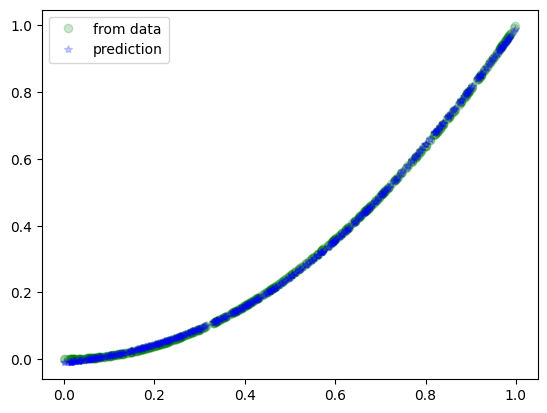

In [6]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linear
        self.sigmoid = nn.Sigmoid()
        # Output Linear function
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function # LINEAR
        out = self.fc1(x)
        # Non-linearity # Non-LINEAR
        out = self.sigmoid(out)
        # Linear function(readout) #LINEAR
        out = self.fc2(out)
        return out

# generate the input data
x_vals = np.random.rand(500)
x_train = np.asarray(x_vals, dtype=np.float32).reshape(-1,1)
y_correct = np.asarray([i**2 for i in x_vals], dtype=np.float32).reshape(-1,1)
# instantiate network
input_dim = 1
output_dim = 1
hidden_dim = 20

modelFF = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
criterionFF = nn.MSELoss() # Mean Squared Loss
l_rate = 0.01

optimizer = torch.optim.Adam(modelFF.parameters(), lr=l_rate)

epochs = 5000
#Training
for epoch in range(epochs):
    epoch += 1
    # increase the number of epochs by 1 every time
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))
    # clear grads
    optimizer.zero_grad()
    # forward to get predicted values
    outputs = modelFF.forward(inputs)
    loss = criterionFF(outputs, labels)
    loss.backward() # back props
    optimizer.step() # update the parameters

    if(epoch+1) % 500 == 0: # Logging
        print('Epoch [%d/%d], Loss: %.4f' %(epoch+1, epochs, loss.item()))
        print('Final - epoch {}, loss {}' .format(epoch, loss.item()))

# Test training
predicted = modelFF(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_correct, 'go', label='from data', alpha=0.2)
plt.plot(x_train, predicted, 'b*', label='prediction', alpha=0.2)
plt.legend()
plt.show()

